# **Logistic Regression to Predict if a Transaction is Fraudulent or Not (Binary Classification)**

Import dependancies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split

Read csv file and show sample of the dataset

In [18]:
df = pd.read_csv("/content/drive/MyDrive/B.Sc. Hons. CS & IT/4. AI/Fraud Detection/1. Logistic Regression/creditcard.csv")

Split dataset into x train and y train

In [19]:
X = df.iloc[:, 1:-1] # removes last (classification/target) column from the dataframe
Y = df.iloc[:, -1] # gets the last (classification/target) column from the dataframe

Convert pandas dataframe to numpy array

In [20]:
X = X.values
Y = Y.values.reshape(-1, 1)

Initialise KFold testing

In [21]:
k = 5

# k-fold initialisation
kf = KFold(n_splits = k, shuffle = True, random_state=42)

Initialise lists to store accuracy and cost for each fold

In [22]:
accuracies = []
costs = []

We define our Sigmoid function, Logistic Regression Algorithm, and a function to calculate the accuracy of the predicted outputs

In [23]:
# sigmoid function
def sigmoid(z):
    return (np.exp(z))/(1 + np.exp(z)) # this expression of the function helps to avoid overflow and divide by zero errors due to values in the data being very small or very large

# logistic regression algorithm
def logisticRegressionAlgorithm(X, Y, learningRate, iterations):
    n = xTrain.shape[0] # number of features.
    m = xTrain.shape[1] # number of observations.

    W = np.zeros((n,1)) # initialise parameters - weights (vector) and bias (scalar)
    b = 0

    costList = []

    for i in range(iterations):
        Z = np.dot(W.T, X) + b # takes into account all observations

        # calculate predicted values for all observations
        Ypred = sigmoid(Z) # returns vector of predicted values for all observations

        # cost function
        epsilon = 1e-15  # small value to avoid log(0) and overflow or divide by zero errors due to values in the data being very small or very large
        cost = -(1/m)*np.sum(Y*np.log(Ypred + epsilon)+(1-Y)*np.log(1-Ypred + epsilon)) # returns scalar

        dW = (1/m)*np.dot(Ypred-Y, X.T) # returns vector
        db = (1/m)*np.sum(Ypred-Y) # returns scalar

        W = W - learningRate*dW.T
        b = b - learningRate*db

        costList.append(cost)

        if(i%(iterations/4)==0):
            print("   Cost at iteration " + str(i) + ": " + str(cost))

    return W, b, costList

def accuracy(X, Y, W, b, f):
  # below is the model (using the optomised parameters W and B)
    Z = np.dot(W.T, X) + b
    Ypred = sigmoid(Z) # prediction vector using optomised model

    Ypred = Ypred > 0.5 # convert array to binary boolean array of true (1) and false (0) with threshold 0.5
    Ypred = np.array(Ypred, dtype = "int64") # convert array to integer array of 1 (fraudulet) and 0 (non-fraudulent)

    # the following takes the average correct predictions as a oercentage
    m = Y.shape[1] # number of observations
    numCorrectPred = np.sum(Ypred == Y)
    acc = (numCorrectPred/m)*100

    print("FOLD "+str(f)+" ACCURACY IS: "+ str(acc)+"%\n")

    return acc

We can now execute the algorithm by making use of k-fold cross-validation

   Cost at iteration 0: 0.6931471805599435
   Cost at iteration 25: 0.2537268361445349
   Cost at iteration 50: 0.22796257527712244
   Cost at iteration 75: 0.21291773286676216
FOLD 1 ACCURACY IS: 99.8139110284049%

   Cost at iteration 0: 0.6931471805599435
   Cost at iteration 25: 0.2557077125766325
   Cost at iteration 50: 0.23025062306473085
   Cost at iteration 75: 0.2154241057305132
FOLD 2 ACCURACY IS: 99.82093325374811%

   Cost at iteration 0: 0.6931471805599436
   Cost at iteration 25: 0.2538994995676857
   Cost at iteration 50: 0.22813399775163645
   Cost at iteration 75: 0.21307568510943933
FOLD 3 ACCURACY IS: 99.82795245869981%

   Cost at iteration 0: 0.6931471805599436
   Cost at iteration 25: 0.25459146017811546
   Cost at iteration 50: 0.2289810124565149
   Cost at iteration 75: 0.2140817841780528
FOLD 4 ACCURACY IS: 99.82093011007531%

   Cost at iteration 0: 0.6931471805599436
   Cost at iteration 25: 0.2550349328916211
   Cost at iteration 50: 0.22939843960361264
   

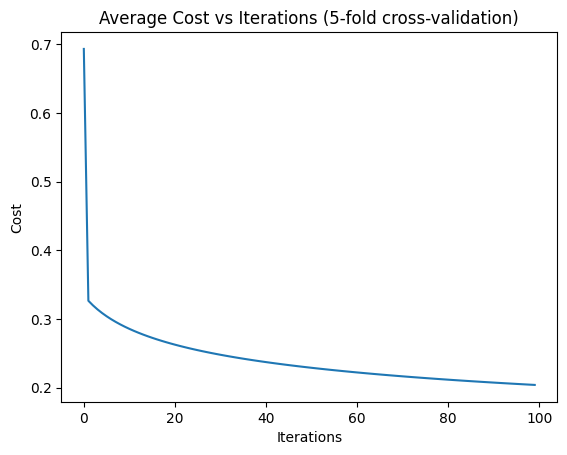

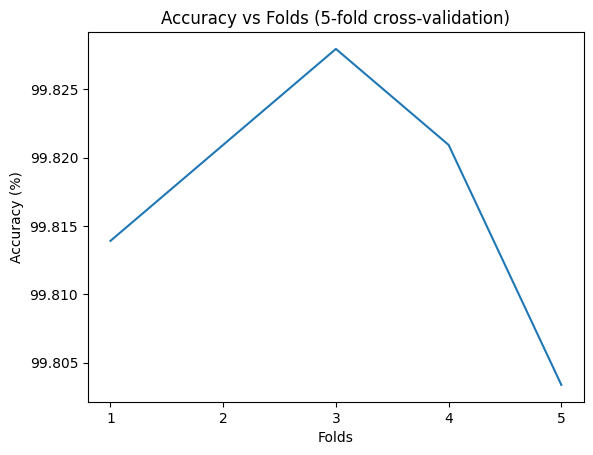

In [24]:
accuracies.clear()
j = 1
for trainIndex, testIndex in kf.split(X):
    xTrain, xTest = X[trainIndex].T, X[testIndex].T
    yTrain, yTest = Y[trainIndex].T, Y[testIndex].T

    n = xTrain.shape[0] # number of features
    m = xTrain.shape[1] # number of observations

    # train the logistic regression model
    W, b, cost = logisticRegressionAlgorithm(xTrain, yTrain, 0.001, 100)

    # calculate accuracy on test set
    acc = accuracy(xTest, yTest, W, b, j)
    accuracies.append(acc)
    j = j + 1

    # save cost for plotting
    costs.append(cost)

# # print the calculated parameters
# print("W = ", W, " B = ", B)

# print average accuracy across all folds
print("AVERAGE ACCURACY ACCROSS ALL FOLDS: {:.2f}%\n".format(np.mean(accuracies)))

# plot average cost across all folds
plt.plot(np.arange(100), np.mean(costs, axis=0))
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Average Cost vs Iterations ({}-fold cross-validation)".format(k))
plt.show()

print("\n")

# plot average cost across all folds
plt.plot(np.arange(1, k + 1), accuracies)
plt.xlabel("Folds")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Folds ({}-fold cross-validation)".format(k))

# set x-ticks to integers
plt.xticks(np.arange(1, k + 1, 1))
plt.show()